In [28]:
#promjenite vrijeme izvodenja na gpu!
import cupy as cp
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import skimage.io
import cupyx
from cupyx import scipy
from cupyx.scipy.ndimage import convolve
from cupyx.scipy.signal import convolve2d

CPU execution time: 0.056713104248046875 seconds
GPU execution time: 0.003832578659057617 seconds


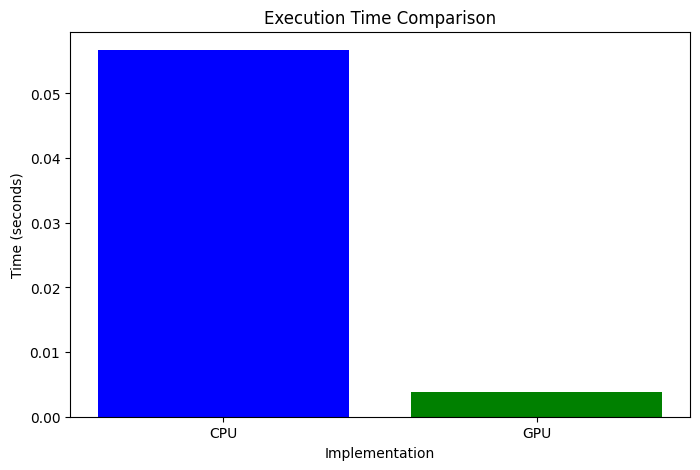

In [31]:
#sobel s numpy
def sobel_operator(image):
    Kx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    Ix = cv2.filter2D(image, -1, Kx)
    Iy = cv2.filter2D(image, -1, Ky)

    G = np.sqrt(Ix**2 + Iy**2)
    G = (G / G.max()) * 255
    return G.astype(np.uint8)

#sobel s cupy
def gpu_sobel_operator(image):
    Kx = cp.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).reshape(3, 3, 1)
    Ky = cp.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).reshape(3, 3, 1)

    image_cp = cp.array(image)

    Ix = convolve(image_cp, Kx, mode='constant')
    Iy = convolve(image_cp, Ky, mode='constant')

    G = np.sqrt(Ix**2 + Iy**2)
    G = (G / G.max()) * 255
    return G.astype(np.uint8)


url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03"
image = skimage.io.imread(url)
image = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

# CPU execution time
start_time = time.time()
edges_cpu = sobel_operator(image)
cpu_time = time.time() - start_time
cv2.imwrite('edges_cpu.jpg', edges_cpu)
print(f"CPU execution time: {cpu_time} seconds")

# GPU execution time
start_time = time.time()
edges_gpu = gpu_sobel_operator(image)
gpu_time = time.time() - start_time
print(f"GPU execution time: {gpu_time} seconds")

# Convert CuPy array to NumPy array for saving with OpenCV
edges_gpu_np = cp.asnumpy(edges_gpu)
cv2.imwrite('edges_gpu.jpg', edges_gpu_np)

"""display
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Edges (CPU)')
plt.imshow(edges_cpu, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Edges (GPU)')
plt.imshow(edges_gpu_np, cmap='gray')"""

plt.show()

labels = ['CPU', 'GPU']
times = [cpu_time, gpu_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, times, color=['blue', 'green'])
plt.title('Execution Time Comparison')
plt.xlabel('Implementation')
plt.ylabel('Time (seconds)')
plt.show()